## Explore the relationship of features

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

from data.load_data import *
from features.feature_build import *

import dpython

ModuleNotFoundError: No module named 'data'

In [5]:
data=load_dat('../data/Consumer_Complaints.csv')

NameError: name 'load_dat' is not defined

In [3]:
data=uniq_Prod_Iss(data)

In [4]:
#cat_cols=['Product','Submitted via','Company response to consumer','Consumer disputed?','Consumer consent provided?']
#data=feature_catconv(data,cat_cols)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1443553 entries, 1509954 to 3437084
Data columns (total 40 columns):
Date received                                                   1443553 non-null datetime64[ns]
Sub-product                                                     1443553 non-null object
Issue                                                           1443553 non-null object
Sub-issue                                                       898287 non-null object
Consumer complaint narrative                                    477088 non-null object
Company public response                                         534928 non-null object
Company                                                         1443553 non-null object
State                                                           1443553 non-null object
Timely response?                                                1443553 non-null bool
SentToCompanyIn(days)                                           1443553 non-null float

In [5]:
ndata=feature_rm(data,'Sub-product','Sub-issue','Date received','Company','Consumer complaint narrative','Company public response')

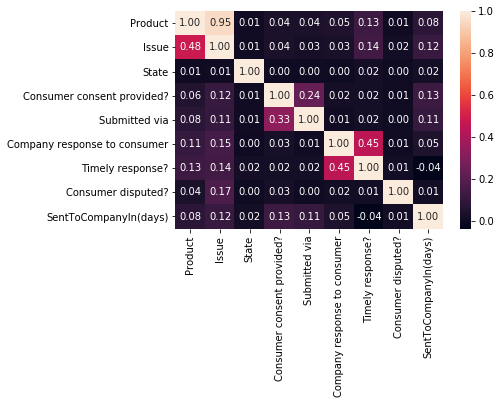

,Product,Issue,State,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,SentToCompanyIn(days)
Product,1.000000,0.954338,0.010716,0.037612,0.036862,0.049503,0.129280,0.006602,0.083591
Issue,0.479437,1.000000,0.008375,0.037981,0.025718,0.033712,0.143035,0.015536,0.117158
State,0.005884,0.009154,1.000000,0.002778,0.002144,0.000926,0.023242,0.000292,0.018450
Consumer consent provided?,0.058709,0.118007,0.007895,1.000000,0.237720,0.021960,0.016573,0.007438,0.126024
Submitted via,0.080319,0.111542,0.008506,0.331845,1.000000,0.010965,0.017329,0.000268,0.109218
Company response to consumer,0.111249,0.150806,0.003788,0.031618,0.011309,1.000000,0.446639,0.006459,0.045632
Timely response?,0.129280,0.143035,0.023242,0.016573,0.017329,0.446639,1.000000,0.014309,-0.036790
Consumer disputed?,0.036259,0.169838,0.002925,0.026171,0.000675,0.015784,0.014309,1.000000,0.012761
SentToCompanyIn(days),0.083591,0.117158,0.018450,0.126024,0.109218,0.045632,-0.036790,0.012761,1.000000


In [8]:
cat_cols=['Product','Submitted via','Company response to consumer','Consumer disputed?','Consumer consent provided?','Issue','State']
associations(ndata,nominal_columns=cat_cols,return_results=True,theil_u=True)

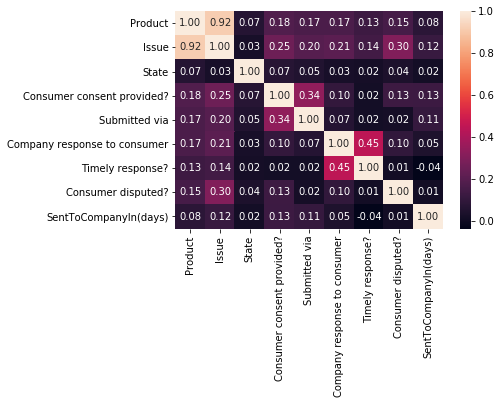

,Product,Issue,State,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,SentToCompanyIn(days)
Product,1.000000,0.915894,0.065423,0.183030,0.165780,0.167231,0.129280,0.153676,0.083591
Issue,0.915894,1.000000,0.030151,0.253803,0.197314,0.208247,0.143035,0.302522,0.117158
State,0.065423,0.030151,1.000000,0.071457,0.053969,0.029006,0.023242,0.043418,0.018450
Consumer consent provided?,0.183030,0.253803,0.071457,1.000000,0.339230,0.103643,0.016573,0.131939,0.126024
Submitted via,0.165780,0.197314,0.053969,0.339230,1.000000,0.065882,0.017329,0.021323,0.109218
Company response to consumer,0.167231,0.208247,0.029006,0.103643,0.065882,1.000000,0.446639,0.100621,0.045632
Timely response?,0.129280,0.143035,0.023242,0.016573,0.017329,0.446639,1.000000,0.014309,-0.036790
Consumer disputed?,0.153676,0.302522,0.043418,0.131939,0.021323,0.100621,0.014309,1.000000,0.012761
SentToCompanyIn(days),0.083591,0.117158,0.018450,0.126024,0.109218,0.045632,-0.036790,0.012761,1.000000


In [9]:
associations(ndata,nominal_columns=cat_cols,return_results=True)

# Feature building

# Modeling

In [4]:
y=data['Timely response?']
X=data.drop('Timely response?')

NameError: name 'data' is not defined

In [147]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.25, random_state=99)

cat_up = CatBoostClassifier(thread_count=4, n_estimators=200, max_depth=8, eta=0.1, loss_function='Logloss' , verbose=10)
cat_up.fit(cat_X_train, up_train, cat_features) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1443553 entries, 1509954 to 3437084
Data columns (total 10 columns):
Date received                   1443553 non-null datetime64[ns]
Product                         1443553 non-null category
Sub-product                     1443553 non-null object
Issue                           1443553 non-null object
Company                         1443553 non-null object
State                           1443553 non-null object
Submitted via                   1443553 non-null category
Company response to consumer    1443553 non-null category
Timely response?                1443553 non-null bool
SentToCompanyIn                 1443553 non-null float64
dtypes: bool(1), category(3), datetime64[ns](1), float64(1), object(4)
memory usage: 82.6+ MB
